In [78]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import vaex as vx
from pyarrow import csv
from datasets import load_dataset

import numpy as np

import matplotlib.pyplot as plt

In [79]:
# %load_ext jupyter_black

In [112]:
some_dummy_freqs = pd.read_csv(list(Path("./inat_ds_plots/").resolve().iterdir())[0])
some_dummy_freqs.columns = ["label", "instances"]
# Doesn't really matter whether sum or freq as we're gonna be sorting and quantil-ing it and the order is the same anyway
some_dummy_freqs["freq"] = some_dummy_freqs.instances / some_dummy_freqs.instances.sum()
some_dummy_freqs["score"] = [np.random.rand() for x in range(len(some_dummy_freqs))]
some_dummy_freqs["score"] = some_dummy_freqs["score"] + some_dummy_freqs["freq"] * 25
# some_dummy_freqs["score"] = some_dummy_freqs["instances"] * np.random.rand()
some_dummy_freqs

,label,instances,freq,score
0,Abeliophyllum distichum Nakai,1,0.000032,0.695048
1,Acacia angustissima (Mill.) Kuntze,1,0.000032,0.844796
2,Acacia auriculiformis A.Cunn. ex Benth.,2,0.000064,0.727242
3,Acacia auriculiformis Benth.,2,0.000064,0.860257
4,Acacia baileyana F.Muell.,8,0.000257,0.545862
...,...,...,...,...
1076,Zamia furfuracea L.f.,1,0.000032,0.762909
1077,Zamia furfuracea L.f. ex Aiton,7,0.000225,0.104464
1078,Zamia pumila L.,3,0.000096,0.674667
1079,Zamioculcas zamiifolia (Lodd.) Engl.,217,0.006973,0.875131


<AxesSubplot:xlabel='instances', ylabel='score'>

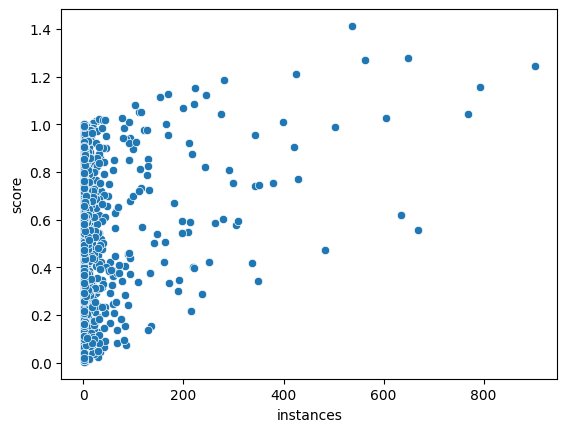

In [113]:
sns.scatterplot(data=some_dummy_freqs, x="instances", y="score")

In [185]:
NUM_CATS = 9

In [186]:
"""
some_dummy_freqs["bin"] = pd.qcut(
    # some_dummy_freqs.score,
    some_dummy_freqs["instances"],
    NUM_CATS,
    # if we use instances instead of freq, issues happen that go away with duplicates=drop
    # If we use quantiles that end up smaller than the 1
    #duplicates="drop",
    # labels=[str(x) for x in range(NUM_CATS)],
)
"""

some_dummy_freqs["bin"] = pd.cut(
    some_dummy_freqs["instances"],
    NUM_CATS,
)
some_dummy_freqs

,label,instances,freq,score,bin,num_train_images
0,Abeliophyllum distichum Nakai,1,0.000032,0.695048,"(0.099, 101.111]",0-113
1,Acacia angustissima (Mill.) Kuntze,1,0.000032,0.844796,"(0.099, 101.111]",0-113
2,Acacia auriculiformis A.Cunn. ex Benth.,2,0.000064,0.727242,"(0.099, 101.111]",0-113
3,Acacia auriculiformis Benth.,2,0.000064,0.860257,"(0.099, 101.111]",0-113
4,Acacia baileyana F.Muell.,8,0.000257,0.545862,"(0.099, 101.111]",0-113
...,...,...,...,...,...,...
1076,Zamia furfuracea L.f.,1,0.000032,0.762909,"(0.099, 101.111]",0-113
1077,Zamia furfuracea L.f. ex Aiton,7,0.000225,0.104464,"(0.099, 101.111]",0-113
1078,Zamia pumila L.,3,0.000096,0.674667,"(0.099, 101.111]",0-113
1079,Zamioculcas zamiifolia (Lodd.) Engl.,217,0.006973,0.875131,"(201.222, 301.333]",113-226


In [187]:
some_dummy_freqs["num_train_images"] = some_dummy_freqs["bin"].apply(
    lambda x: f"{int(x.left)}-{int(x.right)}"
)
some_dummy_freqs

,label,instances,freq,score,bin,num_train_images
0,Abeliophyllum distichum Nakai,1,0.000032,0.695048,"(0.099, 101.111]",0-101
1,Acacia angustissima (Mill.) Kuntze,1,0.000032,0.844796,"(0.099, 101.111]",0-101
2,Acacia auriculiformis A.Cunn. ex Benth.,2,0.000064,0.727242,"(0.099, 101.111]",0-101
3,Acacia auriculiformis Benth.,2,0.000064,0.860257,"(0.099, 101.111]",0-101
4,Acacia baileyana F.Muell.,8,0.000257,0.545862,"(0.099, 101.111]",0-101
...,...,...,...,...,...,...
1076,Zamia furfuracea L.f.,1,0.000032,0.762909,"(0.099, 101.111]",0-101
1077,Zamia furfuracea L.f. ex Aiton,7,0.000225,0.104464,"(0.099, 101.111]",0-101
1078,Zamia pumila L.,3,0.000096,0.674667,"(0.099, 101.111]",0-101
1079,Zamioculcas zamiifolia (Lodd.) Engl.,217,0.006973,0.875131,"(201.222, 301.333]",201-301


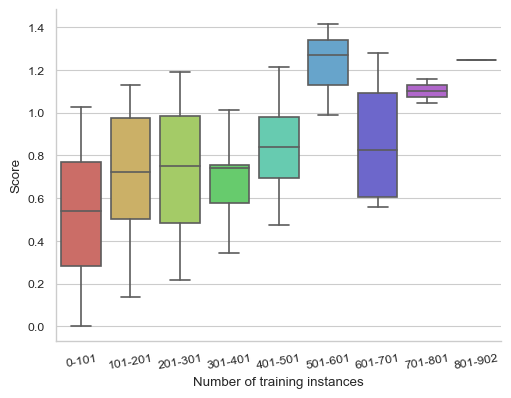

In [199]:
sns.set_theme(context="paper", style="whitegrid")
# g = sns.boxplot(data=some_dummy_freqs, x="num_train_images", y="score")
g = sns.catplot(
    data=some_dummy_freqs,
    x="num_train_images",
    y="score",
    kind="box",
    aspect=1.3,
    height=4.0,
    palette="hls",
)
g.set_axis_labels("Number of training instances", "Score")

# Add if using more columns
g.set_xticklabels(rotation=10)

# Will put it in the folder jupyterlab is run from
g.savefig("freq_score_boxplot.png")